In [6]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [7]:
Pkl_Filename = "ITC_Model.pkl"
sc_file= "ITC_sc.pkl"
global sc
with open(Pkl_Filename, 'rb') as file:  
    regressor = pickle.load(file)

with open(sc_file, 'rb') as file:  
    sc = pickle.load(file)


In [23]:
S= "ITC.NS"
stk = yf.Ticker(S)
df= stk.history(period="10y")
df.iloc[:,0:5].to_csv(S+".csv")

In [27]:
df = pd.read_csv(S+".csv",index_col="Date",parse_dates=True)


In [28]:
train_days= 60

In [29]:
df= df[['Open']]
df= df[-train_days:]

In [36]:
df.tail()

,Open
Date,
2020-10-19,166.800003
2020-10-20,168.000000
2020-10-21,168.149994
2020-10-22,167.550003
2020-10-23,168.949997


In [30]:
testing_df= sc.transform(df)

In [31]:
X_test = []
X_test.append(testing_df[-train_days:])
X_test = np.array(X_test)

In [32]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [33]:
predicted_stock_price = regressor.predict(X_test)

In [34]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [35]:
predicted_stock_price

array([[168.69951]], dtype=float32)

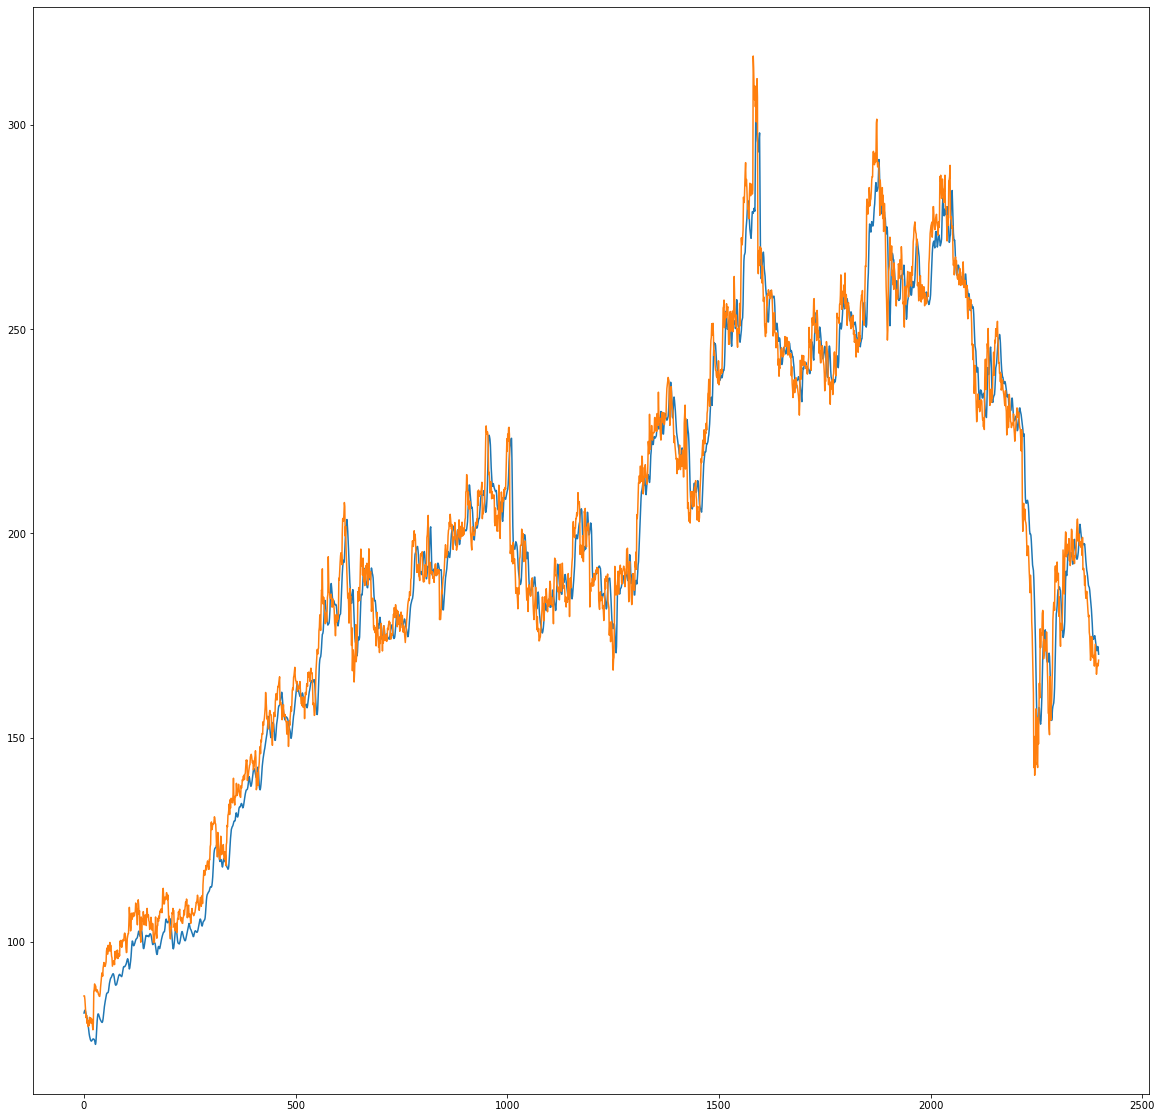

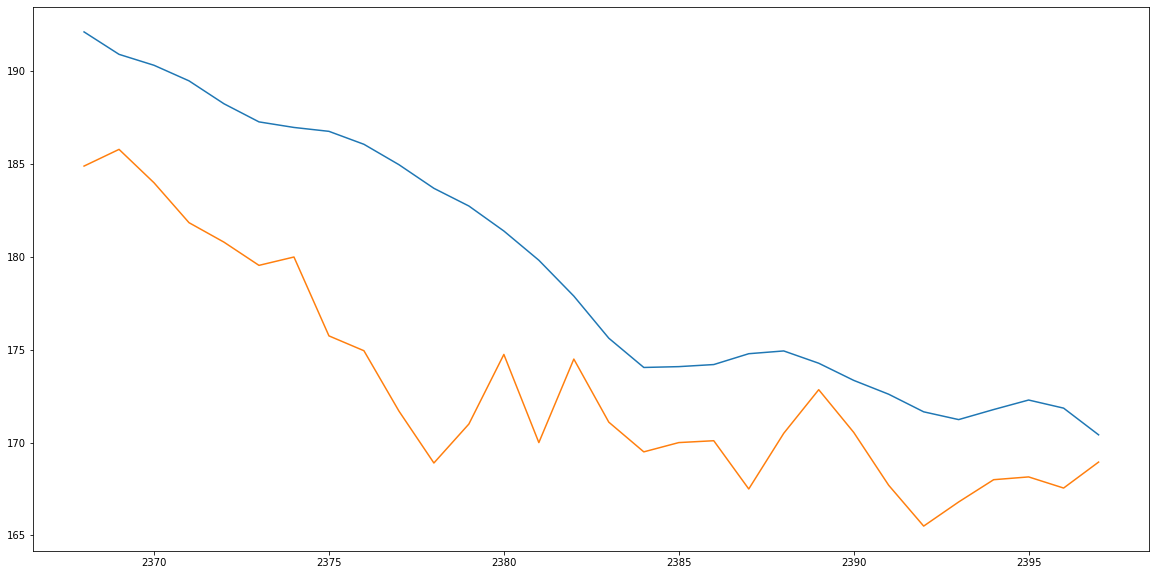